Завдання 1: Повнозв'язана нейромережа (MLP)
Epoch 1/100


2025-11-30 00:10:05.595071: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4775 - loss: 1.1566 - val_accuracy: 0.6147 - val_loss: 0.8130
Epoch 2/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6096 - loss: 0.8603 - val_accuracy: 0.6185 - val_loss: 0.7747
Epoch 3/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6211 - loss: 0.8122 - val_accuracy: 0.6142 - val_loss: 0.7580
Epoch 4/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6241 - loss: 0.7894 - val_accuracy: 0.6131 - val_loss: 0.7446
Epoch 5/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6270 - loss: 0.7674 - val_accuracy: 0.6207 - val_loss: 0.7359
Epoch 6/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6276 - loss: 0.7606 - val_accuracy: 0.6158 - val_loss: 0.7294
Epoch 7/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6318 - loss: 0.7565 - val_accuracy: 0.6190 - val_loss: 0.7235
Epoch 8/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6287 - loss: 0.7491 - val_accuracy: 0.6223

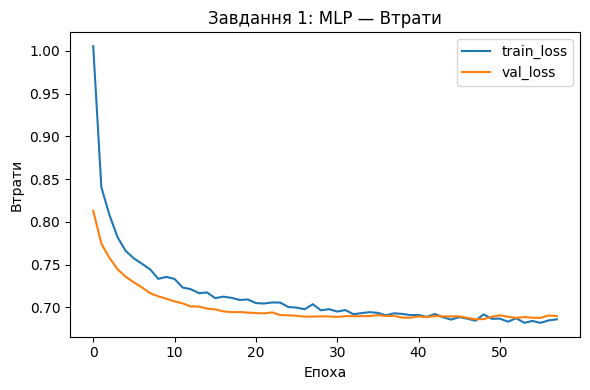

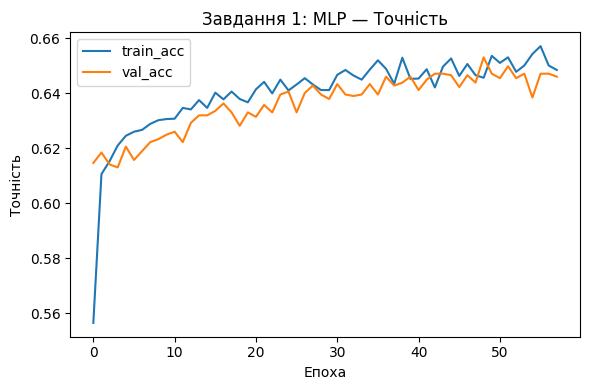

Test accuracy = 0.6485
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification report:
               precision    recall  f1-score   support

        clear       0.68      0.97      0.80       642
       cloudy       0.38      0.33      0.35       123
     overcast       0.69      0.78      0.73      1827
partly cloudy       0.55      0.35      0.43      1368

     accuracy                           0.65      3960
    macro avg       0.58      0.61      0.58      3960
 weighted avg       0.63      0.65      0.63      3960



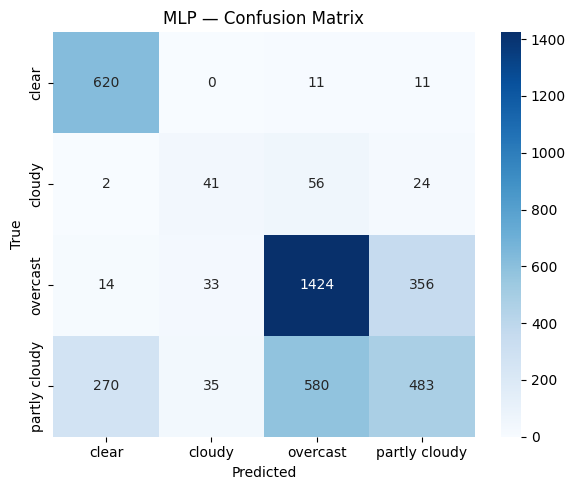

In [2]:
import os
import time
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tf.random.set_seed(8)
np.random.seed(8)
plt.rcParams["figure.figsize"] = (6, 4)
def task1_fnn_weather():
    print("Завдання 1: Повнозв'язана нейромережа (MLP)")
    DATA_PATH = "/kaggle/input/weather-type-classification/weather_classification_data.csv"
    TARGET_COL = "Cloud Cover"
    df = pd.read_csv(DATA_PATH)
    df = df.drop(columns=[c for c in ['Season', 'Location', 'Weather Type'] if c in df.columns])
    df = df[df[TARGET_COL].notna()]
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for c in num_cols:
        df[c] = df[c].fillna(df[c].median())
    le = LabelEncoder()
    y = le.fit_transform(df[TARGET_COL].astype(str))
    X = df.drop(columns=[TARGET_COL])
    class_names = le.classes_
    num_classes = len(class_names)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=8, stratify=y
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    early = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early],
        verbose=1
    )
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title("Завдання 1: MLP — Втрати")
    plt.xlabel("Епоха")
    plt.ylabel("Втрати")
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.figure()
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title("Завдання 1: MLP — Точність")
    plt.xlabel("Епоха")
    plt.ylabel("Точність")
    plt.legend()
    plt.tight_layout()
    plt.show()
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy = {test_acc:.4f}")
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    print("Classification report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("MLP — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
task1_fnn_weather()

Завдання 2a: Проста CNN
Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Found 6862 files belonging to 11 classes.
Using 1372 files for validation.
Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.2462 - loss: 4.0040 - val_accuracy: 0.1465 - val_loss: 2.7572
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.2747 - loss: 2.1322 - val_accuracy: 0.2267 - val_loss: 2.2417
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.2881 - loss: 2.0669 - val_accuracy: 0.4045 - val_loss: 1.9782
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.2865 - loss: 2.0384 - val_accuracy: 0.4169 - val_loss: 1.7405
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.3085 - loss: 1.9582 - val_accuracy: 0.3345 - val_loss: 2.1031


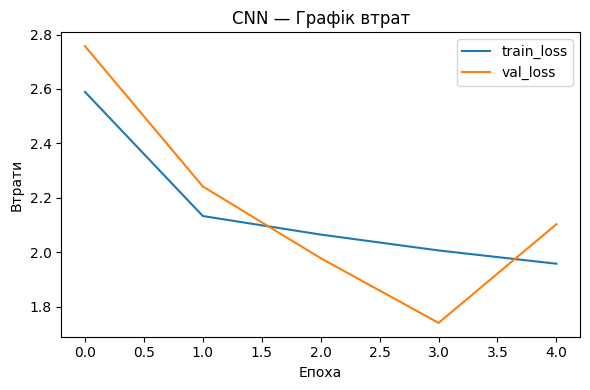

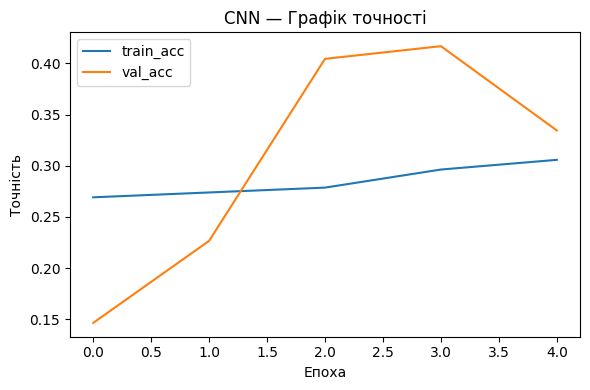

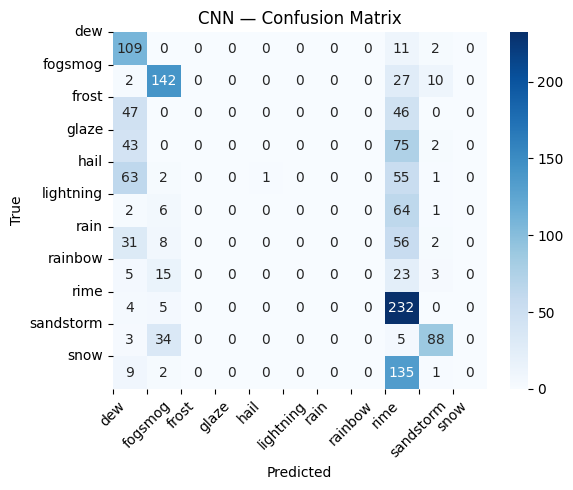

Classification report:
              precision    recall  f1-score   support

         dew       0.34      0.89      0.50       122
     fogsmog       0.66      0.78      0.72       181
       frost       0.00      0.00      0.00        93
       glaze       0.00      0.00      0.00       120
        hail       1.00      0.01      0.02       122
   lightning       0.00      0.00      0.00        73
        rain       0.00      0.00      0.00        97
     rainbow       0.00      0.00      0.00        46
        rime       0.32      0.96      0.48       241
   sandstorm       0.80      0.68      0.73       130
        snow       0.00      0.00      0.00       147

    accuracy                           0.42      1372
   macro avg       0.28      0.30      0.22      1372
weighted avg       0.34      0.42      0.29      1372



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
def task2a_cnn_weather_images(base_dir="/kaggle/input/weather-dataset/dataset"):
    print("Завдання 2a: Проста CNN")
    IMG_SIZE = (128, 128)
    BATCH_SIZE = 32
    VAL_SPLIT = 0.2
    train_ds = tf.keras.utils.image_dataset_from_directory(
        base_dir, validation_split=VAL_SPLIT,
        subset="training", seed=8,
        image_size=IMG_SIZE, batch_size=BATCH_SIZE)

    val_ds = tf.keras.utils.image_dataset_from_directory(
        base_dir, validation_split=VAL_SPLIT,
        subset="validation", seed=8,
        image_size=IMG_SIZE, batch_size=BATCH_SIZE)
    class_names = train_ds.class_names
    num_classes = len(class_names)
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
    val_ds = val_ds.cache().prefetch(AUTOTUNE)
    model = models.Sequential([
        layers.Input(shape=IMG_SIZE + (3,)),
        layers.Rescaling(1./255),

        layers.Conv2D(32, 3, padding="same", activation=None),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, 3, padding="same", activation=None),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Conv2D(128, 3, padding="same", activation=None),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    early = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=5,
        callbacks=[early],
        verbose=1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title("CNN — Графік втрат")
    plt.legend()
    plt.xlabel("Епоха")
    plt.ylabel("Втрати")
    plt.tight_layout()
    plt.show()
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title("CNN — Графік точності")
    plt.legend()
    plt.xlabel("Епоха")
    plt.ylabel("Точність")
    plt.tight_layout()
    plt.show()
    y_true, y_pred = [], []
    for images, labels in val_ds:
        preds = model.predict(images, verbose=0)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("CNN — Confusion Matrix")
    plt.xticks(range(num_classes), class_names, rotation=45)
    plt.yticks(range(num_classes), class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
    print("Classification report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
task2a_cnn_weather_images()

Завдання 2b: MobileNetV2 Transfer Learning
Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Found 6862 files belonging to 11 classes.
Using 1372 files for validation.
Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 99s 500ms/step - accuracy: 0.5578 - loss: 1.3753 - val_accuracy: 0.7923 - val_loss: 0.5966
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 81s 470ms/step - accuracy: 0.7923 - loss: 0.5954 - val_accuracy: 0.8294 - val_loss: 0.5164
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 81s 465ms/step - accuracy: 0.8304 - loss: 0.4875 - val_accuracy: 0.8127 - val_loss: 0.5229
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 87s 505ms/step - accuracy: 0.8495 - loss: 0.4422 - val_accuracy: 0.8251 - val_loss: 0.5091
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 87s 504ms/step - accuracy: 0.8683 - loss: 0.3774 - val_accuracy: 0.8251 - val_loss: 0.4994


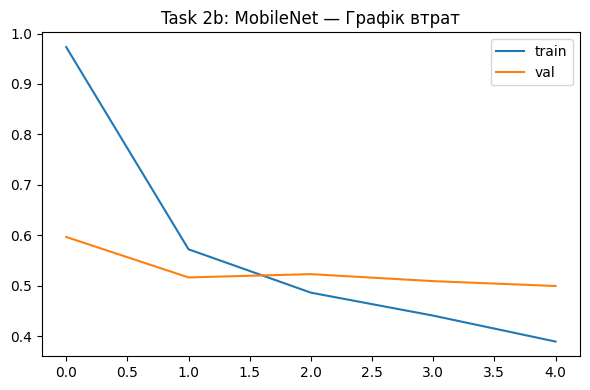

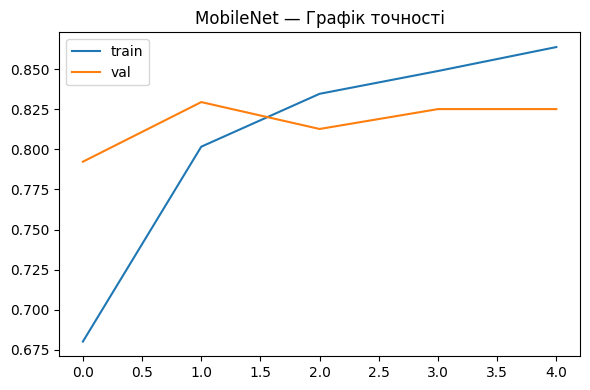

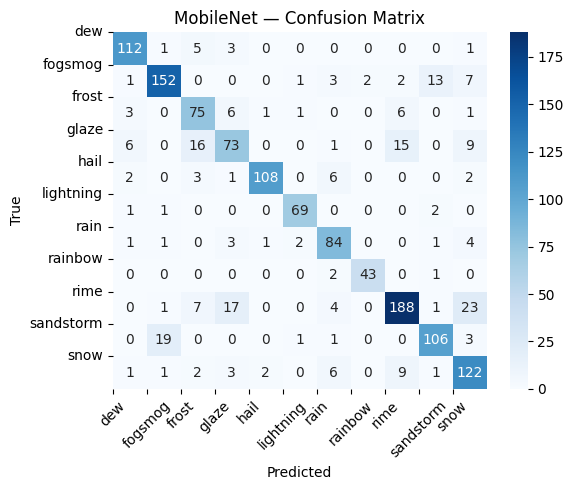

Classification report:
              precision    recall  f1-score   support

         dew       0.88      0.92      0.90       122
     fogsmog       0.86      0.84      0.85       181
       frost       0.69      0.81      0.75        93
       glaze       0.69      0.61      0.65       120
        hail       0.96      0.89      0.92       122
   lightning       0.93      0.95      0.94        73
        rain       0.79      0.87      0.82        97
     rainbow       0.96      0.93      0.95        46
        rime       0.85      0.78      0.82       241
   sandstorm       0.85      0.82      0.83       130
        snow       0.71      0.83      0.76       147

    accuracy                           0.83      1372
   macro avg       0.83      0.84      0.84      1372
weighted avg       0.83      0.83      0.83      1372



In [4]:
from tensorflow.keras.applications import MobileNetV2
WEIGHTS_PATH = "/kaggle/input/ngnbfhb/tensorflow2/default/1/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_160_no_top.h5"
def task2b_mobilenet_weather_images(base_dir="/kaggle/input/weather-dataset/dataset"):
    print("Завдання 2b: MobileNetV2 Transfer Learning")
    IMG_SIZE = 160
    BATCH_SIZE = 32
    VAL_SPLIT = 0.2
    train_ds = tf.keras.utils.image_dataset_from_directory(
        base_dir, validation_split=VAL_SPLIT,
        subset="training", seed=8,
        image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE)
    val_ds = tf.keras.utils.image_dataset_from_directory(
        base_dir, validation_split=VAL_SPLIT,
        subset="validation", seed=8,
        image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE)
    class_names = train_ds.class_names
    num_classes = len(class_names)
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
    val_ds = val_ds.cache().prefetch(AUTOTUNE)
    preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
    base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights=WEIGHTS_PATH)
    base_model.trainable = False
    data_aug = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.1)])
    inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
    x = data_aug(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    history = model.fit(train_ds, validation_data=val_ds, epochs=5)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("MobileNet — Графік втрат")
    plt.legend(["train", "val"])
    plt.tight_layout()
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("MobileNet — Графік точності")
    plt.legend(["train", "val"])
    plt.tight_layout()
    plt.show()
    y_true, y_pred = [], []
    for images, labels in val_ds:
        preds = model.predict(images, verbose=0)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("MobileNet — Confusion Matrix")
    plt.xticks(range(num_classes), class_names, rotation=45)
    plt.yticks(range(num_classes), class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
    print("Classification report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
task2b_mobilenet_weather_images()

In [ ]:
plt.rcParams["figure.figsize"] = (6, 4)
def clean_headline(text): 
    text = str(text).lower()
    text = re.sub(r"@\S+", " ", text)
    text = re.sub(r"https*\S+", " ", text)
    text = re.sub(r"#\S+", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s{2,}',' ', text)
    return text.strip()
def load_clickbait_data(
    CLICKBAIT_PATH="/kaggle/input/clickbait-dataset/clickbait_data.csv",
    TEXT_COL="headline",
    LABEL_COL="clickbait"
):
    print("Завдання 3: Класифікація текстів — Clickbait Dataset")
    df = pd.read_csv(CLICKBAIT_PATH)
    print(df.head())
    df = df[[TEXT_COL, LABEL_COL]].dropna()
    df[LABEL_COL] = df[LABEL_COL].astype(int)
    df["clean_headline"] = df[TEXT_COL].apply(clean_headline)
    X = df["clean_headline"].values
    y = df[LABEL_COL].values
    print(f"\nКількість зразків: {len(X)}")
    print("Розподіл класів (0=non-clickbait, 1=clickbait):", np.bincount(y))
    return X, y

def prepare_tokenizer_and_sequences(X, y, max_words=20000, max_len=30, test_size=0.2):  
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=8, stratify=y)
    tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(X_train)
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")
    print(f"Розмір словника (word_index): {len(tokenizer.word_index)}")
    print(f"Форма X_train_pad: {X_train_pad.shape}, X_test_pad: {X_test_pad.shape}")
    return tokenizer, X_train_pad, X_test_pad, y_train, y_test

def plot_history(history, title_prefix="Model"):
    plt.figure()
    plt.plot(history.history["loss"], label="train_loss")
    if "val_loss" in history.history:
        plt.plot(history.history["val_loss"], label="val_loss")
    plt.title(f"{title_prefix} — Графік втрат")
    plt.xlabel("Епоха")
    plt.ylabel("Втрати")
    plt.legend()
    plt.tight_layout()
    plt.show()   
    plt.figure()
    plt.plot(history.history["accuracy"], label="train_acc")
    if "val_accuracy" in history.history:
        plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.title(f"{title_prefix} — Графік точності")
    plt.xlabel("Епоха")
    plt.ylabel("Точність")
    plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_binary_model(model, X_test, y_test, title=""):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba.ravel() >= 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    print(f"est accuracy = {acc:.4f}")
    print(f"Classification report:")
    print(classification_report(
        y_test, y_pred, digits=4,
        target_names=["non-clickbait", "clickbait"]))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["non-clickbait", "clickbait"],
        yticklabels=["non-clickbait", "clickbait"])
    plt.title(f"{title} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

def task3a_clickbait_lstm_random(
    CLICKBAIT_PATH="/kaggle/input/clickbait-dataset/clickbait_data.csv",
    TEXT_COL="headline",
    LABEL_COL="clickbait",
    MAX_WORDS=20000,
    MAX_LEN=30,
    EMBED_DIM=100,
    EPOCHS=5,
    BATCH_SIZE=64
):
    X, y = load_clickbait_data(
        CLICKBAIT_PATH=CLICKBAIT_PATH,
        TEXT_COL=TEXT_COL,
        LABEL_COL=LABEL_COL
    )
    print("Завдання 3a: Random Embedding + LSTM")
    tokenizer, X_train_pad, X_test_pad, y_train, y_test = prepare_tokenizer_and_sequences(
        X, y, max_words=MAX_WORDS, max_len=MAX_LEN
    )
    vocab_size = min(MAX_WORDS, len(tokenizer.word_index) + 1)
    model = models.Sequential([
        layers.Embedding(
            input_dim=vocab_size,
            output_dim=EMBED_DIM),
        layers.SpatialDropout1D(0.3),
        layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
        layers.Dropout(0.4),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid")])  # binary])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"])
    early = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=3,
        restore_best_weights=True)
    history = model.fit(
        X_train_pad, y_train,
        validation_split=0.2,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[early],
        verbose=1)
    plot_history(history, title_prefix="Random Embedding + LSTM")
    evaluate_binary_model(model, X_test_pad, y_test, title="Random Embedding + LSTM")
    return
task3a_clickbait_lstm_random()

Завдання 3: Класифікація текстів — Clickbait Dataset
                                            headline  clickbait
0                                 Should I Get Bings          1
1      Which TV Female Friend Group Do You Belong In          1
2  The New "Star Wars: The Force Awakens" Trailer...          1
3  This Vine Of New York On "Celebrity Big Brothe...          1
4  A Couple Did A Stunning Photo Shoot With Their...          1

Кількість зразків: 32000
Розподіл класів (0=non-clickbait, 1=clickbait): [16001 15999]
Завдання 3a: Random Embedding + LSTM
Розмір словника (word_index): 20152
Форма X_train_pad: (25600, 30), X_test_pad: (6400, 30)
Epoch 1/5
153/320 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7408 - loss: 0.4865

Завдання 3: Класифікація текстів — Clickbait Dataset
Перші рядки датафрейму:
                                            headline  clickbait
0                                 Should I Get Bings          1
1      Which TV Female Friend Group Do You Belong In          1
2  The New "Star Wars: The Force Awakens" Trailer...          1
3  This Vine Of New York On "Celebrity Big Brothe...          1
4  A Couple Did A Stunning Photo Shoot With Their...          1

Кількість зразків: 32000
Розподіл класів (0=non-clickbait, 1=clickbait): [16001 15999]
Розмір словника (word_index): 20152
Форма X_train_pad: (25600, 30), X_test_pad: (6400, 30)
Завдання 3b: GloVe Embedding + LSTM (Clickbait)
Кількість слів у GloVe: 400000
Embedding matrix готова: (20000, 100)
Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8730 - loss: 0.2916 - val_accuracy: 0.9588 - val_loss: 0.1060
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9645 - loss: 0.1021 - val_accuracy: 0.9705 - va

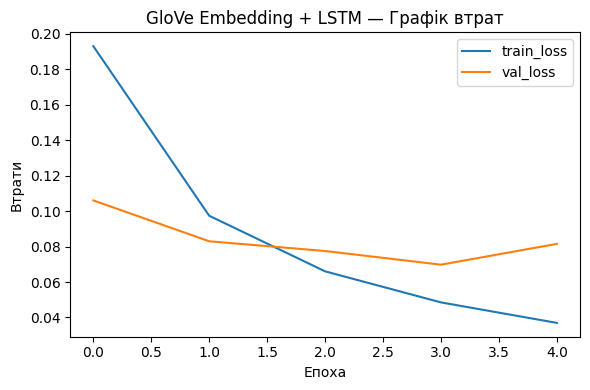

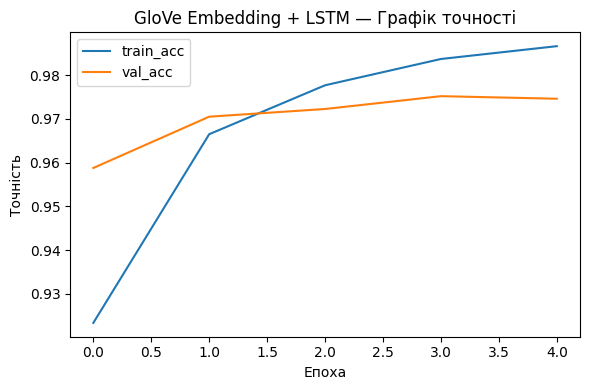

200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
est accuracy = 0.9805
Classification report:
               precision    recall  f1-score   support

non-clickbait     0.9852    0.9756    0.9804      3200
    clickbait     0.9759    0.9853    0.9806      3200

     accuracy                         0.9805      6400
    macro avg     0.9805    0.9805    0.9805      6400
 weighted avg     0.9805    0.9805    0.9805      6400



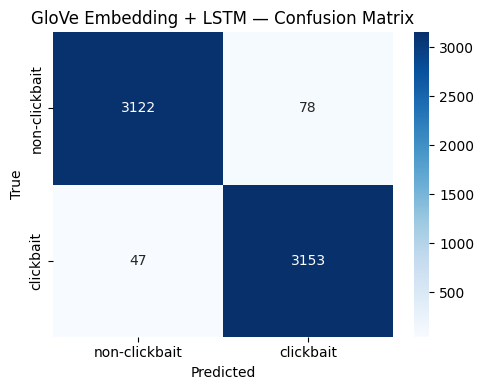

In [9]:
GLOVE_PATH = "/kaggle/input/drgdfgd/pytorch/default/1/glove.6B.100d.txt"
def load_glove_embeddings(
    word_index=None,
    max_words=20000,
    embed_dim=100):
    embeddings_index = {}
    with open(GLOVE_PATH, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coeffs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coeffs
    print(f"Кількість слів у GloVe: {len(embeddings_index)}")
    vocab_size = min(max_words, len(word_index) + 1)
    embedding_matrix = np.zeros((vocab_size, embed_dim), dtype="float32")
    for word, idx in word_index.items():
        if idx >= vocab_size:
            continue
        vector = embeddings_index.get(word)
        if vector is not None:
            embedding_matrix[idx] = vector
    print("Embedding matrix готова:", embedding_matrix.shape)
    return embedding_matrix, vocab_size
def task3b_clickbait_lstm_glove(
    CLICKBAIT_PATH="/kaggle/input/clickbait-dataset/clickbait_data.csv",
    TEXT_COL="headline",
    LABEL_COL="clickbait",
    MAX_WORDS=20000,
    MAX_LEN=30,
    EMBED_DIM=100,
    EPOCHS=5,
    BATCH_SIZE=64):
    X, y = load_clickbait_data(
        CLICKBAIT_PATH=CLICKBAIT_PATH,
        TEXT_COL=TEXT_COL,
        LABEL_COL=LABEL_COL
    )
    print("Завдання 3b: GloVe Embedding + LSTM (Clickbait)")
    tokenizer, X_train_pad, X_test_pad, y_train, y_test = prepare_tokenizer_and_sequences(
        X, y, max_words=MAX_WORDS, max_len=MAX_LEN
    )
    embedding_matrix, vocab_size = load_glove_embeddings(
        word_index=tokenizer.word_index,
        max_words=MAX_WORDS,
        embed_dim=EMBED_DIM
    )
    embedding_layer = layers.Embedding(
        input_dim=vocab_size,
        output_dim=EMBED_DIM,
        weights=[embedding_matrix])
    inputs = tf.keras.Input(shape=(MAX_LEN,))
    x = embedding_layer(inputs)
    x = layers.SpatialDropout1D(0.3)(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"])
    early = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=3,
        restore_best_weights=True)
    history = model.fit(
        X_train_pad, y_train,
        validation_split=0.2,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[early],
        verbose=1)
    plot_history(history, title_prefix="GloVe Embedding + LSTM")
    evaluate_binary_model(model, X_test_pad, y_test, title="GloVe Embedding + LSTM")
    return
task3b_clickbait_lstm_glove()